# Prediciting Heart disease using machine learning

### 🚀 Project Workflow

#### 1️⃣ Problem Definition  
Clearly define the problem you're aiming to solve.

#### 2️⃣ Data  
Collect, clean, and explore the dataset.

#### 3️⃣ Evaluation  
Decide on metrics to evaluate your model (e.g., accuracy, RMSE, F1-score).

#### 4️⃣ Features  
Engineer and select the most relevant features.

#### 5️⃣ Modeling  
Train multiple models and fine-tune hyperparameters.

#### 6️⃣ Experimentation  
Compare results, document findings, and iterate on improvements.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay


In [3]:
df = pd.read_csv("data/heart-disease.csv")

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA(Exploratory Data Analysis)

 the goal here is to find more about data and get knowledge about the data 

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

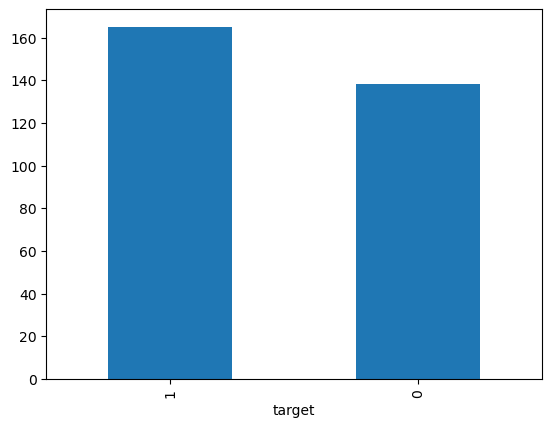

In [13]:
df["target"].value_counts().plot(kind="bar")
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
# lets compare target with sex columns
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
pd.crosstab(df["target"] , df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


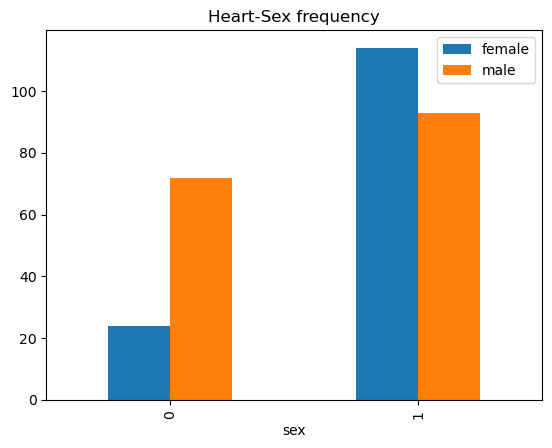

In [51]:
pd.crosstab(df["sex"] , df["target"]).plot(kind="bar")
plt.legend(["female" , "male"])
plt.title("Heart-Sex frequency")
plt.show()

In [27]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

# AGE vs MAX-HEART_RATE  for heart disease(thalach)

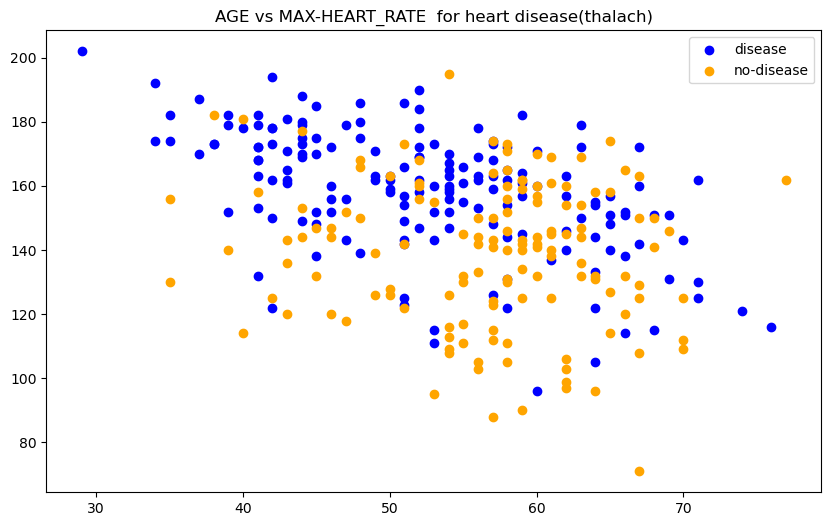

In [44]:
fig , ax = plt.subplots(figsize = (10,6))
ax.scatter(df[df["target"]==1]["age"] , df[df["target"]==1]["thalach"] , c="blue")

ax.scatter(df[df["target"]==0]["age"] , df[df["target"]==0]["thalach"]  , c="orange")
plt.title("AGE vs MAX-HEART_RATE  for heart disease(thalach)")
plt.legend(["disease" , "no-disease"])
plt.show()

In [29]:
df[df["target"]==1]["age"]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

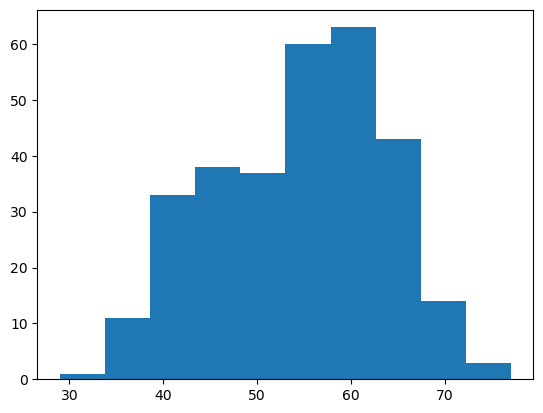

In [45]:
#lets see age
fig , ax = plt.subplots()
ax.hist(df["age"])
plt.show()

# Heart disease and chest pain(CP)
## Heart Disease and Chest Pain (CP) Types

- **0 – Typical Angina**  
  Chest pain or discomfort that usually occurs with physical activity or emotional stress and follows a predictable pattern.

- **1 – Atypical Angina**  
  Chest discomfort that does not follow the classic pattern. It may occur at rest or be triggered by non-physical factors.

- **2 – Non-Anginal Chest Pain**  
  Chest pain not related to heart issues. Causes may include acid reflux, muscle strain, or anxiety.

- **3 – Asymptomatic**  
  No chest pain is experienced despite the presence of heart disease — often referred to as *silent ischemia*.


In [47]:
pd.crosstab(df["target"] , df["cp"])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


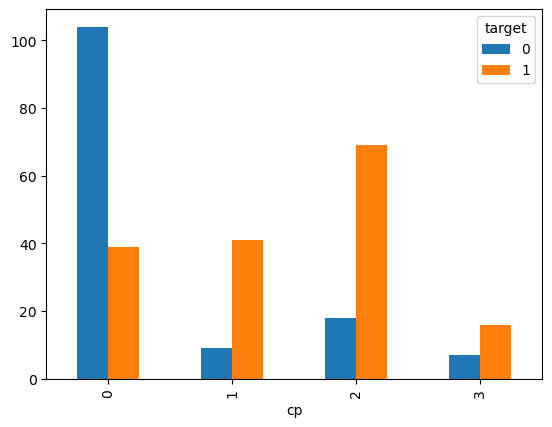

In [50]:
pd.crosstab(df["cp"] , df["target"]).plot(kind="bar")
plt.show()

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Make a correlation matrix

In [53]:
df.corr()  #Compute pairwise correlation of columns, excluding NA/null values.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


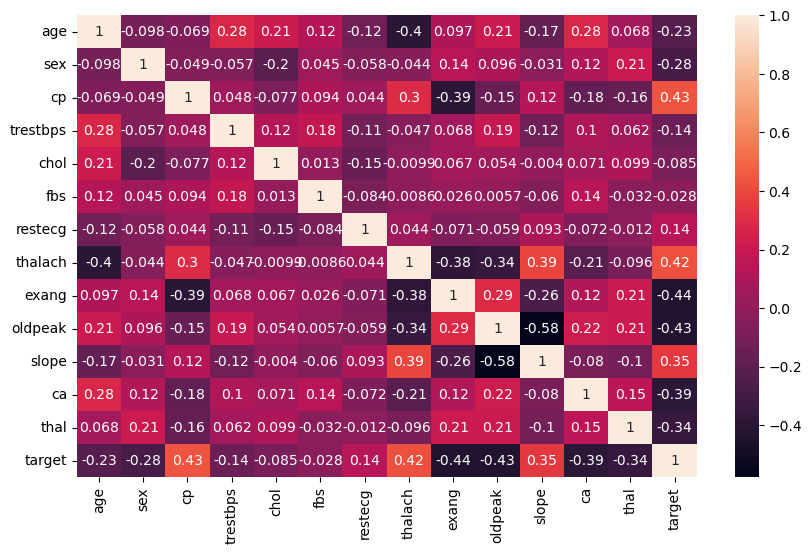

In [58]:
fig , ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(df.corr() , annot=True )
plt.show()

# Modeling

In [63]:
np.random.seed(42)
x = df.drop("target" , axis=1)
y = df["target"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [85]:
models = {"LR":LogisticRegression() , 
         "KNN":KNeighborsClassifier(),
         "RFC":RandomForestClassifier()}

def fit_score(models , x_train , x_test , y_train , y_test):
    np.random.seed(42)
    model_score = {}
    for name , model in models.items():
        model.fit(x_train , y_train)
        model_score[name] = model.score(x_test , y_test)

    return model_score
    

In [86]:
model_scores = fit_score(models , x_train , x_test , y_train , y_test)

/Users/saianand/Documents/ml-heart-disease-projectt/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
model_scores

{'LR': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

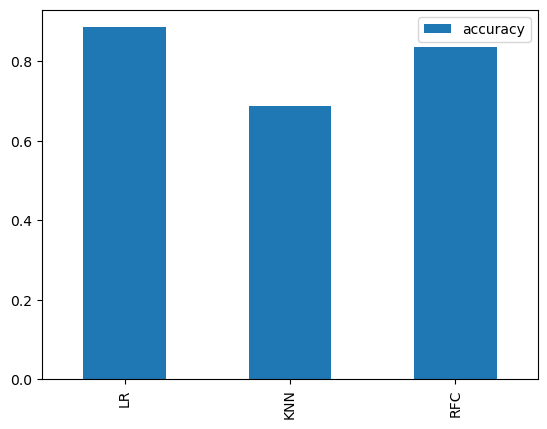

In [93]:
scores_df = pd.DataFrame(model_scores , index=["accuracy"])
scores_df.T.plot.bar()
plt.show()

# HyperParameter Tuning BY HAND

In [98]:
# lets tune KNN
train_scores = []
test_scores = []
knn = KNeighborsClassifier()
n = range(1,21)

for i in range(1 , 21):
    knn.set_params(n_neighbors = i)
    knn.fit(x_train , y_train)
    train_scores.append(knn.score(x_train , y_train))
    test_scores.append(knn.score(x_test , y_test))
    
    

In [99]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [100]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

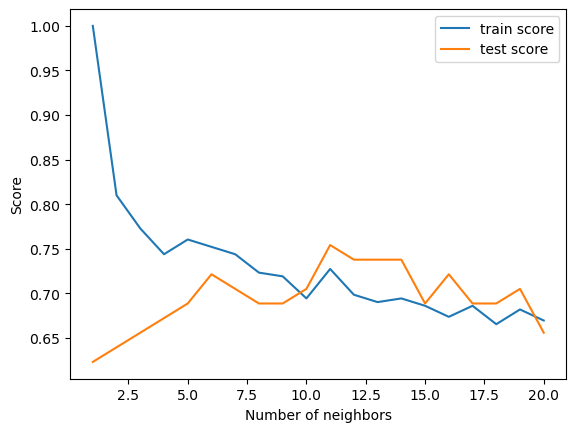

In [103]:
plt.plot(n , train_scores , label="train score")
plt.plot(n , test_scores , label="test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend()
plt.show()

# still very less score lets not use KNN , now use LR and RFC


In [132]:
log_reg_grid = {"C": np.logspace(-4,4,20) , 
               "solver":["liblinear"]}

RFC_grid = {"n_estimators": np.arange(10 , 1000 , 50),
           "max_depth":[None , 3 , 5 , 10] ,
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}


In [133]:
 np.logspace(-4,4,20)


array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [134]:
np.random.seed(42)
rs_log_res = RandomizedSearchCV(LogisticRegression() , param_distributions=log_reg_grid , cv=5 , n_iter =10 , verbose=True)
rs_log_res.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [135]:
rs_log_res.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [136]:
rs_log_res.score(x_test , y_test)

0.8852459016393442

In [142]:
np.random.seed(42)
rs_RFC = RandomizedSearchCV(RandomForestClassifier() , param_distributions=RFC_grid , cv=5 , n_iter=20 )
rs_RFC.fit(x_train , y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [143]:
rs_RFC.score(x_test , y_test)

0.8688524590163934

In [144]:
log_reg_grid2 = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

In [146]:
gs_log_reg  = GridSearchCV(LogisticRegression() , param_grid=log_reg_grid2 , cv=5 , verbose=True)
gs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [147]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [148]:
gs_log_reg.score(x_test , y_test)

0.8852459016393442

# evaluating 

In [149]:
y_preds = gs_log_reg.predict(x_test)

In [150]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

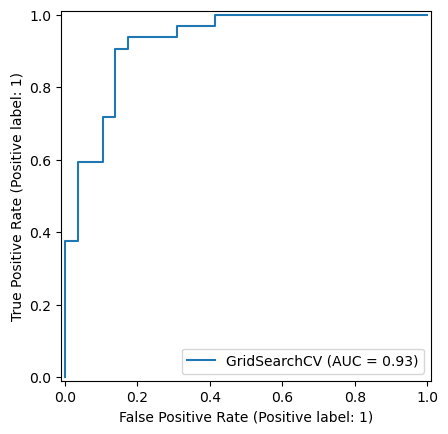

In [156]:
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.show()

In [158]:
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


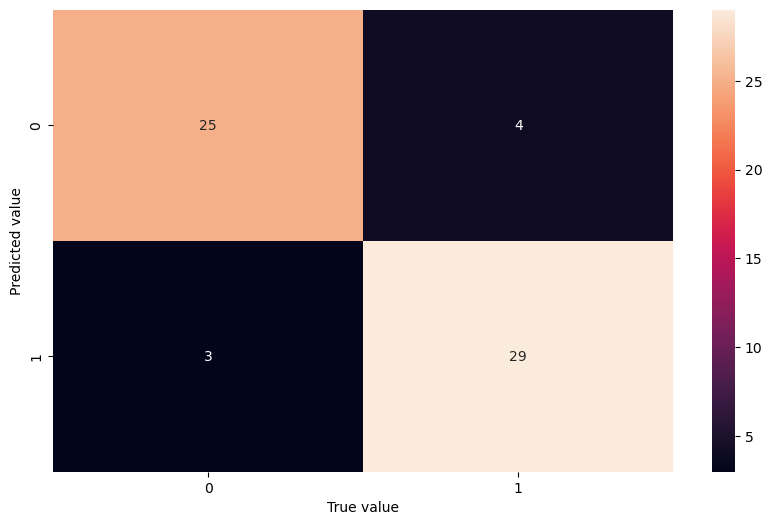

In [167]:
fig , ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(confusion_matrix(y_test , y_preds) , annot=True)
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show()

In [168]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [169]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [172]:
clf = LogisticRegression(C = 0.20433597178569418 , solver = 'liblinear' )

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
cv_acc= cross_val_score(clf , x , y , scoring="accuracy")

In [177]:
np.mean(cv_acc)

np.float64(0.8479781420765027)

In [180]:
cv_pre = cross_val_score(clf , x , y , scoring="precision")
np.mean(cv_pre)

np.float64(0.8215873015873015)

In [181]:
cv_recall = cross_val_score(clf , x , y , scoring="recall")
np.mean(cv_recall)

np.float64(0.9272727272727274)

In [183]:
cv_f1 = cross_val_score(clf , x , y , scoring="f1")
np.mean(cv_f1)

np.float64(0.8705403543192143)

# Feature Importance

In [184]:
clf = LogisticRegression(C = 0.20433597178569418 , solver = 'liblinear' )
clf.fit(x_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [185]:
clf.score(x_test , y_test)

0.8852459016393442

In [186]:
clf.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [188]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [191]:
feature = dict(zip(df.columns , list(clf.coef_[0])))
feature

{'age': np.float64(0.0031672803473471746),
 'sex': np.float64(-0.8604465397334717),
 'cp': np.float64(0.6606703933230701),
 'trestbps': np.float64(-0.011569932224142465),
 'chol': np.float64(-0.0016637439444753457),
 'fbs': np.float64(0.043861055458486765),
 'restecg': np.float64(0.31275849953638685),
 'thalach': np.float64(0.0245936131980898),
 'exang': np.float64(-0.604130820900716),
 'oldpeak': np.float64(-0.5686280121446481),
 'slope': np.float64(0.45051628712277775),
 'ca': np.float64(-0.6360989818014864),
 'thal': np.float64(-0.6766337106855729)}

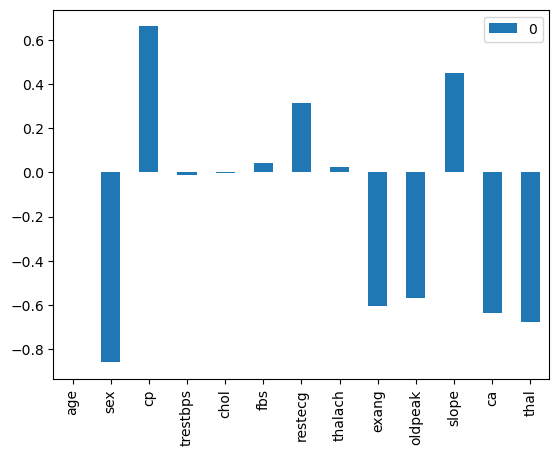

In [199]:
feature_df = pd.DataFrame(feature, index=[0])
feature_df.T.plot.bar()
plt.show()

In [201]:
pd.crosstab(df["sex"] , df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [204]:
with open("heart_model22.pkl", "wb") as f:
    pickle.dump(clf, f)

In [205]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
